<a href="https://colab.research.google.com/github/ajrianop/Machine-Learning-Notebooks/blob/main/09_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA or Principal Components Analysis**

We have several problems that have a huge number of dimensions, so dimensionality reduction becomes necessary to distill higher dimensionality data while preserving variance as much as possible.

One example where we can observe dimensionality reduction is K-Means, where the data is reduced down to k-dimensions.

PCA (Principal Component Analysis) involves a high-level technique that utilizes linear algebra and probability theory. The idea behind PCA is to find the eigenvectors in the higher dimensionality space such that the hyperplanes associated with these vectors capture the most variance. This allows us to project the information onto these hyperplanes, which then serve as representations of our information with a smaller number of dimensions. The implementation of this technique is called Singular Value Decomposition (SVD).

We are going to work with the load_iris dataset, which can be found in the sklearn library. This dataset comprises samples of three different species of iris flowers, along with various measurements including sepal length, sepal width, petal length, and petal width.

This dataset is commonly used for classification and clustering tasks in machine learning.


## **Import libraries**

In [1]:
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [2]:
# Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
numSamples, numFeatures = iris.data.shape
print(f'Let us examine some of the information contained in the iris dictionary:\n')
print(f'The number of samples (rows) is  {numSamples}')
print(f'The number of features (columns) is  {numFeatures}')
print(f'The different iris species that we have are {list(iris.target_names)}')

Let us examine some of the information contained in the iris dictionary:

The number of samples (rows) is  150
The number of features (columns) is  4
The different iris species that we have are ['setosa', 'versicolor', 'virginica']


According to the previous dataset, we aim to apply PCA to reduce the dimensionality of the dataset, specifically from 4 features to 2.

In [4]:
# Extracting the features and sample
X = iris.data

# Initializing the Principal Component Analysis technique
pca = PCA(n_components=2, whiten=True)

# Training the Principal Component Analysis technique
pca = pca.fit(X)

# Transforming the data according to PCA to only 2 features
X_pca = pca.transform(X)

X_pca

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919],
       [-1.2191728 ,  1.30947554],
       [-1.27062918,  0.02990145],
       [-1.35493432, -0.47727214],
       [-1.5677929 , -1.03811965],
       [-1.28618899,  2.39286603],
       [-1.16037307,  2.71623681],
       [-1.2758681 ,  1.64566141],
       [-1.28791362,  0.63304684],
       [-1.06981161,  1.77184386],
       [-1.25858365,  1.04251602],
       [-1.12351854,  0.79442356],
       [-1.23704894,  0.87897239],
       [-1.56396833,  0.27093722],
       [-1.11985996,  0.20037678],
       [-1.14564495, -0.07568135],
       [-1.21903752, -0.29641102],
       [-1.20063096,  0.26582861],
       [-1.24610158,  0.74646111],
       [-1.28365251,

In [5]:
# Extracting the features and sample
X = iris.data

# Initializing the Principal Component Analysis technique
pca = PCA(n_components=2, whiten=True)

# Training the Principal Component Analysis technique
pca = pca.fit(X)

# Transforming the data according to PCA to only 2 features
X_pca = pca.transform(X)

The attribute `components_` contains the principal axes in feature space, also known as the principal components. These components represent the directions of maximum variance in the original feature space. So, according to our 4D space, we reduce the data to a 2D plane, which is composed by two vector, which are the basis to this new plane where we are going to project the original values.

In [6]:
print('The components for our new plane are described by:')
pca.components_

The components for our new plane are described by:


array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

To see how our component are describing the variance of the dataset, we can use the attribute `explained_variance_ratio_`

In [7]:
print(f'The first component describe a variance of {pca.explained_variance_ratio_[0]}')
print(f'The first component describe a variance of {pca.explained_variance_ratio_[1]}')
print(f'The total of the variance explained is {sum(pca.explained_variance_ratio_)}')

The first component describe a variance of 0.9246187232017271
The first component describe a variance of 0.05306648311706782
The total of the variance explained is 0.977685206318795


After fitting the PCA model (pca.fit(X)), if you examine pca.explained_variance_ratio_, you will observe that the first component explains 92% of the variance, and the second component explains 5% of the variance.

This means that when we project the data onto the principal components obtained from PCA, we retain the majority of the variance present in the original dataset. Specifically, by using only the first two principal components, we capture 97% (92% + 5%) of the total variance. This indicates that we lose less than 3% of the variance by reducing the dimensionality of the data using PCA.

Therefore, we can conclude that the PCA technique effectively captures the essential information in the dataset while significantly reducing its dimensionality. This reduction can lead to simpler models and more efficient computations while preserving the majority of the dataset's variance.

By performing Principal Component Analysis (PCA) and reducing the dimensionality of the dataset from 4 dimensions to 2 dimensions, we observe that the new 2-dimensional representation retains a significant amount of the original information. This suggests that the original 4 dimensions were not all necessary to capture the variability present in the dataset. Instead, the majority of the variance can be effectively captured and represented in just 2 dimensions. This reduction in dimensionality can lead to simpler models, improved interpretability, and more efficient computations without sacrificing much of the information inherent in the data.

Let us see the plot of the previous data with the new components as a basis:

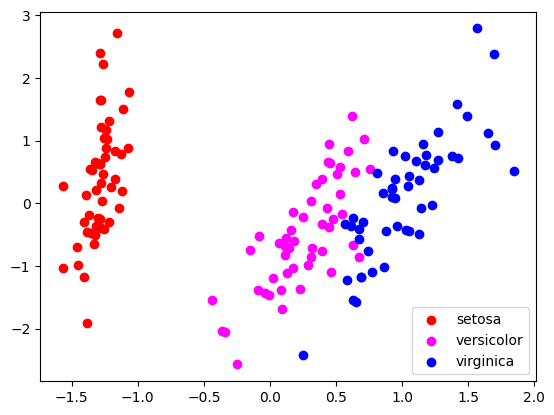

In [12]:
colors = ['red', 'magenta', 'blue']
target_ids = range(len(iris.target_names))
pl.figure()
for name, color, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == name, 0], X_pca[iris.target == name, 1],
        c=color, label=label)
pl.legend()
pl.show()